# Image Classification – Deep Learning Project in Python with Keras

## Steps for image classification on CIFAR-10:

### 1. Load the dataset from keras datasets module

In [13]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

In [14]:
# the data type of the variables
print(type(train_X))
print(type(train_Y))
print(type(test_X))
print(type(test_X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# Get the shape of the arrays
print('train_X shape:', train_X.shape)# 50000 rows of data, which contains 32*32 images with depth 3
print('train_Y shape:', train_Y.shape)# 50000 rows of data, and 1 column( one dimension )
print('test_X shape:', test_X.shape)# 10000 rows of data, which contains 32*32 images with depth 3
print('test_Y shape:', test_Y.shape)# 10000 rows of data, and 1 column (one dimension)

train_X shape: (50000, 32, 32, 3)
train_Y shape: (50000, 1)
test_X shape: (10000, 32, 32, 3)
test_Y shape: (10000, 1)


### 2. Plot some images from the dataset to visualize the dataset

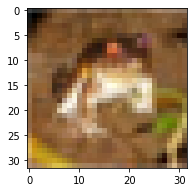

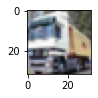

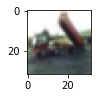

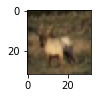

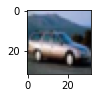

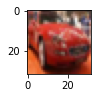

In [16]:
# Look at some of the 32*32 images
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

### 3. Import the required layers and modules to create our convolution neural net architecture

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

### 4. Convert the pixel values of the dataset to float type and then normalize the dataset

In [18]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

index = 0
# Normalize the pixels to be values between 0 and 1
train_X=train_X/255.0
test_X=test_X/255.0

In [19]:
train_X[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### 5. Now perform the one-hot encoding for target classes

In [20]:
# Convert the labels into a set of numbers to input into the neural network
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

### 6. Create the sequential model and add the layers

In [21]:
# Create the model architecture
model=Sequential()

# Add the first convolution layer
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))

# Add a drop out layer
# Note number 0.2 is the dropout rate, depends on situation, 0.5 is commonly used.
# If overestimated, can increase the rate.
model.add(Dropout(0.2))

# Add the second convolution layer
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))

# Add a pooling layer with 2*2 pixel filter
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer(reduce dimension to an array)
model.add(Flatten())

# Add a layer with 512 neurons
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with neurons, size is num_classes(size is optional to you)
model.add(Dense(num_classes, activation='softmax'))

### 7. Configure the optimizer and compile the model

In [22]:
# Stochastic Gradient Descent(SGD)
# Similar concept with linear regression, use gradient descent to update the parameters of sigmoid regression( min loss function)
# Other optimizer: Batch/Stochastic/Mini-batch 
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

### 8. View the model summary for better understanding of model architecture

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

### 9. Train the model

In [24]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 145s 3ms/step - loss: 1.7666 - accuracy: 0.3611 - val_loss: 1.4109 - val_accuracy: 0.4936
Epoch 2/10
50000/50000 [==============================] - 149s 3ms/step - loss: 1.3714 - accuracy: 0.5056 - val_loss: 1.2081 - val_accuracy: 0.5670
Epoch 3/10
50000/50000 [==============================] - 125s 2ms/step - loss: 1.2030 - accuracy: 0.5708 - val_loss: 1.1506 - val_accuracy: 0.5946
Epoch 4/10
50000/50000 [==============================] - 136s 3ms/step - loss: 1.0966 - accuracy: 0.6101 - val_loss: 1.0636 - val_accuracy: 0.6173
Epoch 5/10
50000/50000 [==============================] - 132s 3ms/step - loss: 1.0082 - accuracy: 0.6406 - val_loss: 1.0077 - val_accuracy: 0.6419
Epoch 6/10
50000/50000 [==============================] - 134s 3ms/step - loss: 0.9250 - accuracy: 0.6706 - val_loss: 0.9782 - val_accuracy: 0.6515
Epoch 7/10
50000/50000 [==============================] - 154s

### 10. Calculate its accuracy on testing data

In [25]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

10000/10000 [==============================] - 3s 298us/step
67.89000034332275


### 11. Save the model

In [27]:
model.save("model1_cifar_10epoch.h5")

#### Note: You can test the result on your custom image input. To improve accuracy, try increasing the epoch count to 25 for training.

## Then time to have fun :D

In [2]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify the images
from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')
#dictionary to label all the CIFAR-10 dataset classes.
classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
                            (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

aeroplane
aeroplane
aeroplane
ship
aeroplane
truck
